# 2.2 Feature Preprocessing
## User-level data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user = pd.read_csv(r'users.csv')

In [3]:
user.head()

id  article_n  duration   age education
0   1       3401      4080  23.0        高中
1   2          1         0  22.0        初中
2   3          1         0  41.0        大学
3   4          1         0  28.0        初中
4   5          1         0  40.0        初中

In [4]:
user.describe()

id    article_n     duration          age
count  1994.000000  1994.000000  1994.000000  1984.000000
mean    994.653460    14.503009   164.534604    33.698589
std     575.510594   139.535284   490.368680     9.073293
min       1.000000   -27.000000     0.000000    18.000000
25%     496.250000     1.000000     0.000000    26.000000
50%     994.500000     1.000000     0.000000    34.000000
75%    1492.750000     3.000000    14.000000    41.000000
max    1991.000000  4582.000000  4169.000000    49.000000

### 2.2.1 Impute Missing Values

In [5]:
# Check missing values in age
user['age'].isna().sum() 

10

In [6]:
# Substitute nan values in age with the mean value
user['age'].fillna((user["age"].astype(float).mean()), inplace=True)
user['age'].isna().sum() 

0

### 2.2.2 Remove Extreme Values

In [7]:
user['article_n'].describe()

count    1994.000000
mean       14.503009
std       139.535284
min       -27.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      4582.000000
Name: article_n, dtype: float64

In [8]:
# Drop negative and extremely large values of article_n
user = user[(user['article_n']>0) &(user['article_n']<=1000) ] 
user.describe()  

id    article_n     duration          age
count  1981.000000  1981.000000  1981.000000  1981.000000
mean    996.158001     9.806663   159.127713    33.723365
std     575.581689    45.361739   470.667823     9.043115
min       2.000000     1.000000     0.000000    18.000000
25%     498.000000     1.000000     0.000000    26.000000
50%     998.000000     1.000000     0.000000    34.000000
75%    1494.000000     3.000000    14.000000    41.000000
max    1991.000000   868.000000  4169.000000    49.000000

### 2.2.3 Transform Skewed Distribution

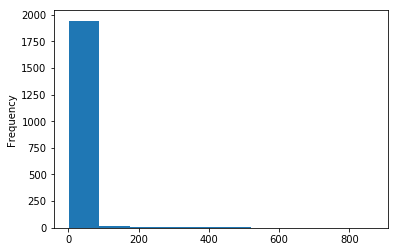

In [9]:
# Inspect article_n's distribution
user['article_n'].plot.hist()

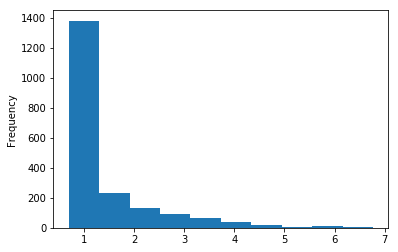

In [10]:
# Log-transform article_n
user['article_n_log']=user['article_n'].map(lambda x: np.log(x+1))
user['article_n_log'].plot.hist()

### 2.2.4 Standardize Features with Different Scales 

Exercise: Defer to Day 3

### 2.2.5 Drop Duplicated Cases

In [11]:
# Detect duplicated cases
dup = user.duplicated()
dup.value_counts()

False    1978
True        3
dtype: int64

In [12]:
# Remove duplicated cases
user.drop_duplicates(inplace=True)
dup2 = user.duplicated()
dup2.value_counts()

False    1978
dtype: int64

### 2.2.6 Transform Categorical Features

In [13]:
# Convert categorical variable of education to multiple binary variables
user['education'].value_counts()

初中     701
高中     668
大学     287
小学     244
研究生     78
Name: education, dtype: int64

In [14]:
edu = pd.get_dummies(user['education'])
user2 = pd.concat([user,edu],axis=1) 
user2.head()

id  article_n  duration   age education  article_n_log  初中  大学  小学  研究生  高中
1   2          1         0  22.0        初中       0.693147   1   0   0    0   0
2   3          1         0  41.0        大学       0.693147   0   1   0    0   0
3   4          1         0  28.0        初中       0.693147   1   0   0    0   0
4   5          1         0  40.0        初中       0.693147   1   0   0    0   0
5   6          1         0  32.0        高中       0.693147   0   0   0    0   1

In [15]:
user2.describe()

id    article_n    duration          age  article_n_log  \
count  1978.000000  1978.000000  1978.00000  1978.000000    1978.000000   
mean    997.515672     9.794237   159.07634    33.719912       1.297525   
std     574.960184    45.392334   470.97144     9.044842       1.006165   
min       2.000000     1.000000     0.00000    18.000000       0.693147   
25%     500.250000     1.000000     0.00000    26.000000       0.693147   
50%     999.500000     1.000000     0.00000    34.000000       0.693147   
75%    1494.750000     3.000000    13.75000    41.000000       1.386294   
max    1991.000000   868.000000  4169.00000    49.000000       6.767343   

                初中           大学           小学          研究生           高中  
count  1978.000000  1978.000000  1978.000000  1978.000000  1978.000000  
mean      0.354398     0.145096     0.123357     0.039434     0.337715  
std       0.478452     0.352287     0.328930     0.194674     0.473050  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000     0.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [16]:
user2.to_pickle('users2.pkl')